In [1]:
#laplace
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
from sympy import pprint
# Laplace transform (t->s)
U = laplace_transform(5*t, t, s)
pprint('U')
pprint(U[0])
# Result: 5/s**2

# Inverse Laplace transform (s->t)
X = inverse_laplace_transform(U[0],s,t)
pprint('X')
pprint(X)
# Result: 5*t*Heaviside(t)

# Function
F = 5*(s+1)/(s+3)**2
pprint('F')
pprint(F)
# Result: (5*s + 5)/(s + 3)**2

# Partial fraction decomposition
G = sym.apart(F)
pprint('G')
pprint(G)
# Result: 5/(s + 3) - 10/(s + 3)**2

# denominator of transfer function
d1 = (s+1)*(s+3)*(s**2+3*s+1)

# expand polynomial
d2 = sym.expand(d1)
pprint('d2')
pprint(d2)
# Result: s**4 + 7*s**3 + 16*s**2 + 13*s + 3

# find roots
pprint(sym.roots(d2))
# Result: {-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}


U
5 
──
 2
s 
X
5⋅t⋅θ(t)
F
5⋅s + 5 
────────
       2
(s + 3) 
G
  5        10   
───── - ────────
s + 3          2
        (s + 3) 
d2
 4      3       2           
s  + 7⋅s  + 16⋅s  + 13⋅s + 3
⎧                3   √5       3   √5   ⎫
⎨-3: 1, -1: 1, - ─ - ──: 1, - ─ + ──: 1⎬
⎩                2   2        2   2    ⎭


In [32]:
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
from sympy import pprint
# Laplace transform (t->s)
U = laplace_transform(5*t-4*t, t, s)
pprint('U')
print(U[0])

U
s**(-2)


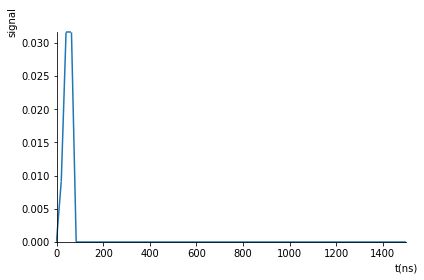

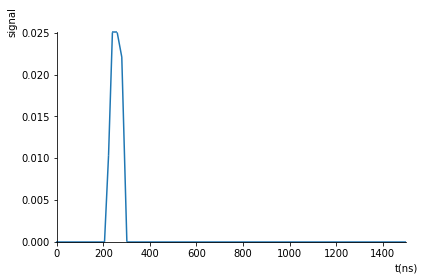

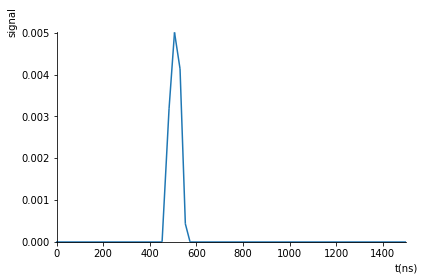

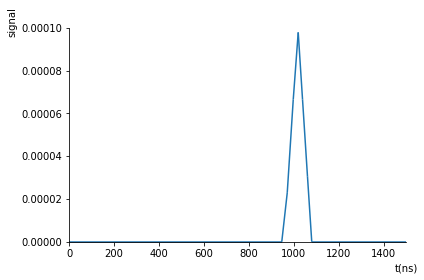

In [83]:
import numpy as np
import sympy as sym
from sympy.plotting import plot
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
from sympy import pprint, exp
def output(d):
    NA=0.5
    wl=650e-9 # m
    deltat=61.4 #ns
    nco=1.482#PMMA
    ncl=np.sqrt(nco**2-NA**2)
    #d=0.05 #fibre length km
    c=0.3e-3 #light v km/ns
    gamma=61.4 #ns the width of signal 3.07Mb/s
    at=200 #dB/km
    #fibre response in laplace
    #1/(s*deltat)*(exp(-d/c*nco*s)-exp(-d/c*nco**2/ncl*s))
    #input signal
    #X = inverse_laplace_transform(1/s*exp(-30.7*s)-1/s*exp(-61.4*s),s,t)  initialsignal
    #1/s*exp(gamma*s/2)-1/s*exp(-gamma*s/2)  time
    #input signal in laplace a squre pulse
    #1/s*exp(-30.7*s)-1/s*exp(-61.4*s)
    X = inverse_laplace_transform((1/s*exp(gamma*s/2)-1/s*exp(-gamma*s/2))*1/(s*deltat)*(exp(-d/c*nco*s)-exp(-d/c*nco**2/ncl*s)),s,t)
    return X*pow(10,-at/10*d)
    
for i in [0.01,0.05,0.1,0.2]:
    plot(output(i),(t,-1,1500),xlabel='t(ns)',ylabel='signal')


In [40]:
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
from sympy import pprint, exp
#1/s*exp(-30.7*s)-1/s*exp(-61.4*s)
X = inverse_laplace_transform(1/s*exp(-30.7e-9*s)-1/s*exp(-61.4e-9*s),s,t)

In [ ]:
import numpy as np
import sympy as sym
from sympy.plotting import plot
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
from sympy import pprint, exp
def output(d):
    NA=0.5
    wl=650e-9 # m
    deltat=61.4 #ns
    nco=1.482#PMMA
    ncl=np.sqrt(nco**2-NA**2)
    #d=0.05 #fibre length km
    c=0.3e-3 #light v km/ns
    gamma=61.4 #ns the width of signal 3.07Mb/s
    at=200 #dB/km
    #fibre response in laplace
    #1/(s*deltat)*(exp(-d/c*nco*s)-exp(-d/c*nco**2/ncl*s))
    #input signal
    #X = inverse_laplace_transform(1/s*exp(-30.7*s)-1/s*exp(-61.4*s),s,t)  initialsignal
    #1/s*exp(gamma*s/2)-1/s*exp(-gamma*s/2)  time
    #input signal in laplace a squre pulse
    #1/s*exp(-30.7*s)-1/s*exp(-61.4*s)
    X = inverse_laplace_transform((1/s*exp(gamma*s/2)-1/s*exp(-gamma*s/2))*1/(s*deltat)*(exp(-d/c*nco*s)-exp(-d/c*nco**2/ncl*s)),s,t)
    return X*pow(10,-at/10*d)
    
for i in [0.01,0.05,0.1,0.2]:
    plot(output(i),(t,-1,1500),xlabel='t(ns)',ylabel='signal')

In [532]:
#范例
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


In [533]:
nco=1.4440
NA=0.22
c=3e8
d=1e3 #the length of fibre
bit_rate=10e6


In [534]:
ncl=np.sqrt(nco**2-NA**2)

In [535]:
def delta_t(z): #z  the length of fibre
    return (z/c)*(nco-ncl)*(nco/ncl)

In [536]:
def h(z,t):  #impulse response
    return(np.heaviside(t,0)-np.heaviside(t-delta_t(z),0))/(delta_t(z))

In [537]:
def waveform(t,bits):
    bit=int(bit_rate*t) # the order of bits
    if bit< bits.size:
        return bits[bit]
    return 0

In [538]:
def output(times, bits):
    f_input=[]
    for time in times:
        f_input += [waveform(time,bits)]
    f_input= np.array(f_input)  #list->ndarray
    #plt.plot(times,output)
    return np.convolve(h(d,times),f_input,mode='same')

In [575]:
times=np.linspace(0,10/bit_rate,100)
bits = np.random.randint(0,2,10)
f_output=output(times,bits)

In [576]:
bits

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

array([87942910.97734702, 87942910.97734702, 70354328.7818776 ,
       52765746.58640821, 35177164.3909388 , 17588582.1954694 ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
       17588582.1954694 , 35177164.3909388 , 52765746.58640821,
       70354328.7818776 , 87942910.97734702, 87942910.97734702,
       87942910.97734702, 87942910.97734702, 87942910.97734702,
       87942910.97734702, 70354328.7818776 , 52765746.58640821,
       35177164.3909388 , 17588582.1954694 ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.     

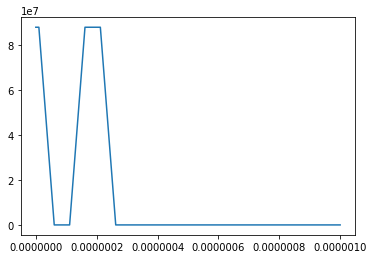

In [577]:
plt.plot(times,f_output)
f_output

In [548]:
output(times,bits)

array([87942910.97734702, 87942910.97734702, 87942910.97734702,
       87942910.97734702, 87942910.97734702, 87942910.97734702,
       87942910.97734702, 87942910.97734702, 87942910.97734702,
       87942910.97734702, 87942910.97734702, 87942910.97734702,
       70354328.7818776 , 52765746.58640821, 35177164.3909388 ,
       17588582.1954694 ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        , 17588582.1954694 ,
       35177164.3909388 , 52765746.58640821, 70354328.7818776 ,
       87942910.97734702, 87942910.97734702, 87942910.97734702,
       87942910.97734702, 87942910.97734702, 87942910.97734702,
       87942910.97734702, 87942910.97734702, 87942910.97734702,
       87942910.97734702, 87942910.97734

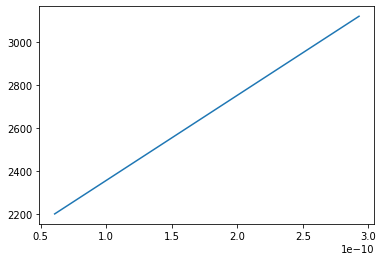

In [523]:
times=np.linspace(0,10/bit_rate,100)  # max x=10*circle
bits = np.random.randint(0,2,10)
plt.plot(times[6:30],output(times,bits)[6:30])

In [460]:
times=np.linspace(0,10/bit_rate,100)
f_outputs=[]
for i in range(10):
    bits = np.random.randint(0,2,10)   # random integer in [0,2)
    f_outputs +=[output(times,bits)[6:30]]
eye_diagram_elements=np.array(f_outputs)
plt.plot(times[6:30],eye_diagram_elements.transpose())

In [461]:
plt.plot(times,waveform(times,bits))

TypeError: only size-1 arrays can be converted to Python scalars

[0 0 1 1 0 1]


<function matplotlib.pyplot.show(*args, **kw)>

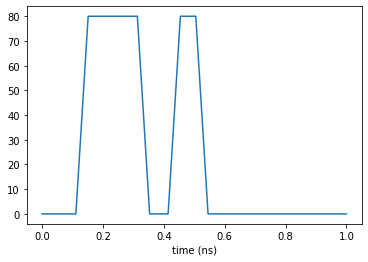

In [649]:
#milestone 2
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
#nco=1.4440
#NA=0.22
c=3e8
#d=1e3 #the length of fibre
bit_rate=1e10
bit_cycle=(1/bit_rate)*1e9 #ns    0.1 ns
time_range=10*bit_cycle  #xx*0.1
delta_t=bit_cycle/2

Pin=43
Rd=25
noise=Pin*Rd


#ncl=np.sqrt(nco**2-NA**2)
#def delta_t(z): #z  the length of fibre
#    return (z/c)*(nco-ncl)*(nco/ncl)
def h(t):  #impulse response
    return(np.heaviside(t,0)-np.heaviside(t-delta_t,0))/(delta_t)

def waveform(t,bits):
    bit=int(t/bit_cycle) # the order of bits
    if bit< bits.size:
        return bits[bit]
    return 0

def output(times, bits):
    f_input=[]
    for time in times:
        f_input += [waveform(time,bits)]
    f_input= np.array(f_input)  #list->ndarray
    #plt.plot(times,output)
    return np.convolve(h(times),f_input,mode='same')
times=np.linspace(0,time_range,100)
f_outputs=[]
bits = np.random.randint(0,2,10)   # random integer in [0,2)
print(bits[-6:])
#print(output(times,bits))
plt.plot(times,output(times,bits))# 1-x 2-y
plt.xlabel('time (ns)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

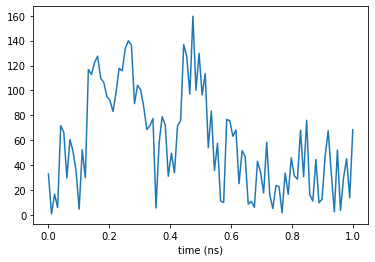

In [651]:
no=np.random.rand(100)*80
plt.plot(times,(no+output(times,bits)))# 1-x 2-y
plt.xlabel('time (ns)')
plt.show

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.   40.   80.  120.  160.  200.  240.
  280.  320.  360.  400.  440.  480.  520.  560.  600.  640.  680.  720.
  760.  800.  840.  880.  920.  960. 1000. 1040. 1080. 1120. 1160. 1200.
 1240. 1280. 1320. 1360. 1400. 1440. 1480. 1520. 1560. 1600. 1640. 1680.
 1720. 1760. 1800. 1840. 1880. 1920. 1960. 1960. 1960. 1960. 1960. 1960.
 1960. 1960. 1960. 1960. 1960. 1960. 1960. 1960. 19

<function matplotlib.pyplot.show(*args, **kw)>

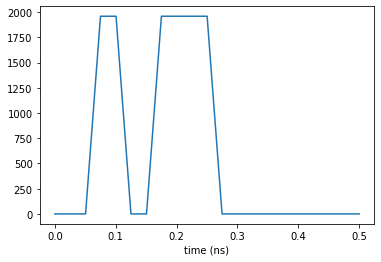

In [353]:
h(times)[6000:8000:100]

array([], dtype=float64)

<function matplotlib.pyplot.show(*args, **kw)>

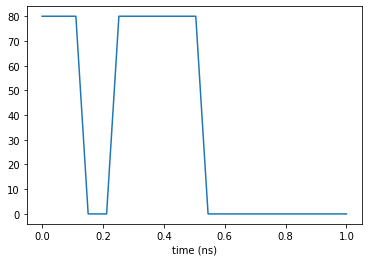

In [356]:
plt.plot(times,output(times,bits))# 1-x 2-y
plt.xlabel('time (ns)')
plt.show
